In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
# Importar o dataset
df = pd.read_csv('../data/dataset_problema2.csv')

X = df.drop(['id', 'Severidade'], axis=1)
y = df['Severidade']

In [23]:
# Separar dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
# Padronização das variáveis
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)


In [25]:
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_train.columns)

# Validação cruzada para selecionar o número de variáveis
modelo_linear = LinearRegression()
score = cross_val_score(modelo_linear, X_train_sc, y_train, cv=10)
print(np.mean(score))

0.8417215821030458


In [26]:

# Seleção de variáveis
max_f = 20
lista_r2 = list()

for i in range(1, max_f + 1):
    selector = RFE(modelo_linear, n_features_to_select=i, step=1)
    selector = selector.fit(X_train_sc, y_train)
    mask = selector.support_
    features = X_train_sc.columns
    sel_features = features[mask]
    X_sel = X_train_sc[sel_features]
    modelo_linear = LinearRegression()
    score = cross_val_score(modelo_linear, X_sel, y_train, cv=10, scoring='neg_root_mean_squared_error')
    lista_r2.append(np.abs(np.mean(score)))
    print(np.abs(np.mean(score)))

22.999512866756277
20.978943999475103
12.213396211508062
11.313324687680517


8.638765107372922
8.67306852752466
8.758615941202397
8.882267359116286
7.610800020392202
7.501372965777241
7.698979572990166
7.651101456128744
7.655357291863628
7.786765054018021
7.865091875876468
7.954618243225215
8.051802922422864
8.087998611985732
8.197654755128694
8.252242790523852


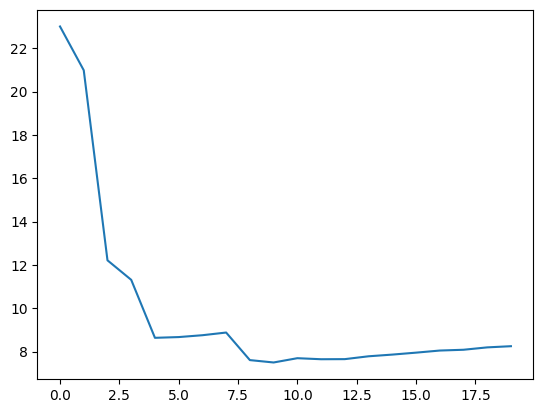

In [27]:
# Gráfico
plt.plot(lista_r2)
plt.show()

In [28]:
# Selecionar as features
modelo_linear = LinearRegression()
selector = RFE(modelo_linear, n_features_to_select=10, step=1)
selector = selector.fit(X_train_sc, y_train)
mask = selector.support_
features = X_train_sc.columns
sel_features = features[mask]
print(sel_features)

# Validação cruzada
X_sel = X_train_sc[sel_features]
score = cross_val_score(modelo_linear, X_sel, y_train, cv=10, scoring='r2')
print(np.mean(score))

# Modelo final - Regressão linear multipla
modelo_linear = LinearRegression()
modelo_linear.fit(X_sel, y_train)
coef = modelo_linear.coef_
print(coef)
# r2 = modelo_linear.score(X_train, y_train)

Index(['NDVI_d28', 'SAVI_d28', 'NDVI_d01', 'SAVI_d01', 'NDVI_d04', 'SAVI_d04',
       'NDVI_d08', 'SAVI_d08', 'GNDVI_d08', 'SR_d08'],
      dtype='object')
0.8655536026351045
[-3.48320174e+04  3.48360344e+04  6.23485877e+04 -6.23356138e+04
 -1.60865847e+04  1.60746797e+04  2.52778047e+04 -2.52600932e+04
 -5.26898795e+00 -2.82718382e+01]


In [29]:
# Teste final
y_pred = modelo_linear.predict(X_test_sc[sel_features])
r2 = modelo_linear.score(X_test_sc[sel_features], y_test)
rmse = (mean_squared_error(y_test, y_pred)) ** 0.5
mae = mean_absolute_error(y_test, y_pred)
print("RMSE", rmse)
print("MAE", mae)
print("R2", r2)

RMSE 7.539476072278346
MAE 6.344066348950323
R2 0.887634277870405


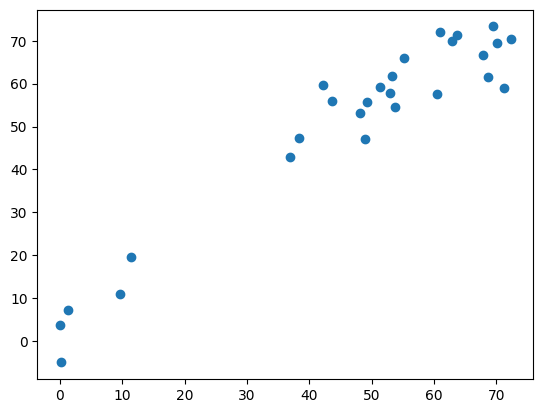

0.9187543089518092


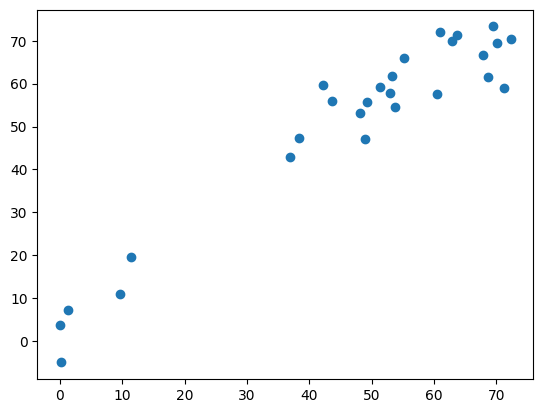

In [30]:
plt.scatter(y_test, y_pred)
plt.show()

# R2 da validação
model_r2 = LinearRegression()
model_r2.fit(np.array(y_test).reshape(-1, 1), y_pred)
plt.scatter(y_test, y_pred)
print(model_r2.score(np.array(y_test).reshape(-1, 1), y_pred))